### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calcular ingresos totales por tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingresos_tienda1:,.2f}")
print(f"Tienda 2: ${ingresos_tienda2:,.2f}")
print(f"Tienda 3: ${ingresos_tienda3:,.2f}")
print(f"Tienda 4: ${ingresos_tienda4:,.2f}")

Ingresos totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [ ]:
# Análisis de productos vendidos por categoría
def analizar_ventas_por_categoria(df, nombre_tienda):
    ventas_por_categoria = df['Categoría del Producto'].value_counts().reset_index()
    ventas_por_categoria.columns = ['Categoría del Producto', 'Cantidad Vendida']
    ventas_por_categoria['Tienda'] = nombre_tienda
    return ventas_por_categoria

# Aplicamos la función a cada tienda (conservando tus nombres originales)
ventas_tienda = analizar_ventas_por_categoria(tienda, 'Tienda 1')
ventas_tienda2 = analizar_ventas_por_categoria(tienda2, 'Tienda 2')
ventas_tienda3 = analizar_ventas_por_categoria(tienda3, 'Tienda 3')
ventas_tienda4 = analizar_ventas_por_categoria(tienda4, 'Tienda 4')

# Combinamos todos los resultados
ventas_combinadas = pd.concat([ventas_tienda, ventas_tienda2, ventas_tienda3, ventas_tienda4])

# Mostramos resultados individuales por tienda
print("\n=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===")
for t in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    print(f"\n{t.upper()}:")
    df_temp = ventas_combinadas[ventas_combinadas['Tienda'] == t]
    display(df_temp.sort_values('Cantidad Vendida', ascending=False))

# Identificamos las categorías más populares por tienda
print("\n=== CATEGORÍAS MÁS POPULARES POR TIENDA ===")
for t in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    top_categoria = ventas_combinadas[ventas_combinadas['Tienda'] == t].nlargest(1, 'Cantidad Vendida')
    print(f"\nEn {t} la categoría más popular es: {top_categoria['Categoría del Producto'].values[0]}")
    print(f"Con un total de {top_categoria['Cantidad Vendida'].values[0]} unidades vendidas")


=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===

TIENDA 1:


,Categoría del Producto,Cantidad Vendida,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
7,Artículos para el hogar,171,Tienda 1



TIENDA 2:


,Categoría del Producto,Cantidad Vendida,Tienda
0,Muebles,442,Tienda 2
1,Electrónicos,422,Tienda 2
2,Juguetes,313,Tienda 2
3,Electrodomésticos,305,Tienda 2
4,Deportes y diversión,275,Tienda 2
5,Instrumentos musicales,224,Tienda 2
6,Libros,197,Tienda 2
7,Artículos para el hogar,181,Tienda 2



TIENDA 3:


,Categoría del Producto,Cantidad Vendida,Tienda
0,Muebles,499,Tienda 3
1,Electrónicos,451,Tienda 3
2,Juguetes,315,Tienda 3
3,Electrodomésticos,278,Tienda 3
4,Deportes y diversión,277,Tienda 3
5,Libros,185,Tienda 3
6,Instrumentos musicales,177,Tienda 3
7,Artículos para el hogar,177,Tienda 3



TIENDA 4:


,Categoría del Producto,Cantidad Vendida,Tienda
0,Muebles,480,Tienda 4
1,Electrónicos,451,Tienda 4
2,Juguetes,338,Tienda 4
3,Deportes y diversión,277,Tienda 4
4,Electrodomésticos,254,Tienda 4
5,Artículos para el hogar,201,Tienda 4
6,Libros,187,Tienda 4
7,Instrumentos musicales,170,Tienda 4



=== CATEGORÍAS MÁS POPULARES POR TIENDA ===

En Tienda 1 la categoría más popular es: Muebles
Con un total de 465 unidades vendidas

En Tienda 2 la categoría más popular es: Muebles
Con un total de 442 unidades vendidas

En Tienda 3 la categoría más popular es: Muebles
Con un total de 499 unidades vendidas

En Tienda 4 la categoría más popular es: Muebles
Con un total de 480 unidades vendidas


# 3. Calificación promedio de la tienda


In [ ]:
import matplotlib.pyplot as plt

# Calculamos el promedio de calificaciones por tienda
promedios = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Convertimos a DataFrame para mejor visualización
df_promedios = pd.DataFrame.from_dict(promedios, orient='index', columns=['Calificación Promedio'])
df_promedios.index.name = 'Tienda'
df_promedios = df_promedios.reset_index()

# Mostramos los resultados
print("=== CALIFICACIONES PROMEDIO POR TIENDA ===")
display(df_promedios.sort_values('Calificación Promedio', ascending=False))

=== CALIFICACIONES PROMEDIO POR TIENDA ===


,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


# 4. Productos más y menos vendidos

In [ ]:
# Función para analizar productos por tienda
def analizar_productos(df, nombre_tienda):
    # Contar ventas por producto
    ventas_producto = df['Producto'].value_counts().reset_index()
    ventas_producto.columns = ['Producto', 'Ventas']

    # Identificar top y peor producto
    top_producto = ventas_producto.nlargest(1, 'Ventas')
    peor_producto = ventas_producto.nsmallest(1, 'Ventas')

    return {
        'tienda': nombre_tienda,
        'ventas_por_producto': ventas_producto,
        'top_producto': top_producto,
        'peor_producto': peor_producto
    }

# Analizamos cada tienda
analisis_tienda = analizar_productos(tienda, 'Tienda 1')
analisis_tienda2 = analizar_productos(tienda2, 'Tienda 2')
analisis_tienda3 = analizar_productos(tienda3, 'Tienda 3')
analisis_tienda4 = analizar_productos(tienda4, 'Tienda 4')

# Mostramos resultados en tablas
print("=== PRODUCTOS MÁS VENDIDOS POR TIENDA ===")
for analisis in [analisis_tienda, analisis_tienda2, analisis_tienda3, analisis_tienda4]:
    print(f"\n{analisis['tienda'].upper()}:")
    print(f"Producto más vendido: {analisis['top_producto']['Producto'].values[0]} ({analisis['top_producto']['Ventas'].values[0]} ventas)")
    print(f"Producto menos vendido: {analisis['peor_producto']['Producto'].values[0]} ({analisis['peor_producto']['Ventas'].values[0]} ventas)")
    display(analisis['ventas_por_producto'].sort_values('Ventas', ascending=False))


=== PRODUCTOS MÁS VENDIDOS POR TIENDA ===

TIENDA 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)


,Producto,Ventas
0,Microondas,60
1,TV LED UHD 4K,60
2,Armario,60
3,Secadora de ropa,58
4,Mesa de noche,56
5,Bloques de construcción,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Vaso térmico,54
9,Refrigerador,54



TIENDA 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)


,Producto,Ventas
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Guitarra acústica,58
4,Pandereta,58
5,Secadora de ropa,57
6,Iphone 15,55
7,Bloques de construcción,54
8,Armario,54
9,Set de ollas,52



TIENDA 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)


,Producto,Ventas
0,Kit de bancas,57
1,Mesa de comedor,56
2,Cama king,56
3,Set de ollas,55
4,Mesa de noche,55
5,Smart TV,54
6,Estufa,53
7,Cuerda para saltar,53
8,Modelado predictivo,53
9,Carrito de control remoto,52



TIENDA 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


,Producto,Ventas
0,Cama box,62
1,Cubertería,59
2,Dashboards con Power BI,56
3,Cama king,56
4,Carrito de control remoto,55
5,Mesa de comedor,55
6,Mesa de noche,55
7,Smart TV,54
8,Bloques de construcción,54
9,Pandereta,52


# 5. Envío promedio por tienda

In [ ]:
# Calculamos el costo de envío promedio por tienda
envios_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Convertimos a DataFrame para mejor visualización
df_envios = pd.DataFrame.from_dict(envios_promedio, orient='index', columns=['Costo de Envío Promedio'])
df_envios.index.name = 'Tienda'
df_envios = df_envios.reset_index()

# Mostramos los resultados
print("=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===")
display(df_envios.sort_values('Costo de Envío Promedio', ascending=False))

# Tabla resumen con estadísticas importantes
print("\n=== ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA ===")
estadisticas = pd.concat([
    tienda['Costo de envío'].describe().rename('Tienda 1'),
    tienda2['Costo de envío'].describe().rename('Tienda 2'),
    tienda3['Costo de envío'].describe().rename('Tienda 3'),
    tienda4['Costo de envío'].describe().rename('Tienda 4')
], axis=1)

display(estadisticas.round(2))

=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===


,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167



=== ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA ===


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
count,2359.00,2359.00,2359.00,2358.00
mean,26018.61,25216.24,24805.68,23459.46
std,32860.00,31741.38,30945.89,30279.10
min,0.00,0.00,0.00,0.00
25%,3100.00,2900.00,3100.00,2900.00
50%,12400.00,11600.00,11900.00,10950.00
75%,36000.00,35450.00,34950.00,33300.00
max,160800.00,162500.00,158400.00,154700.00


# 6. resumen visual realizado para al venta de la tienda

# 6.1. GRAFICA: INGRESOS VS COSTOS POR TIENDA

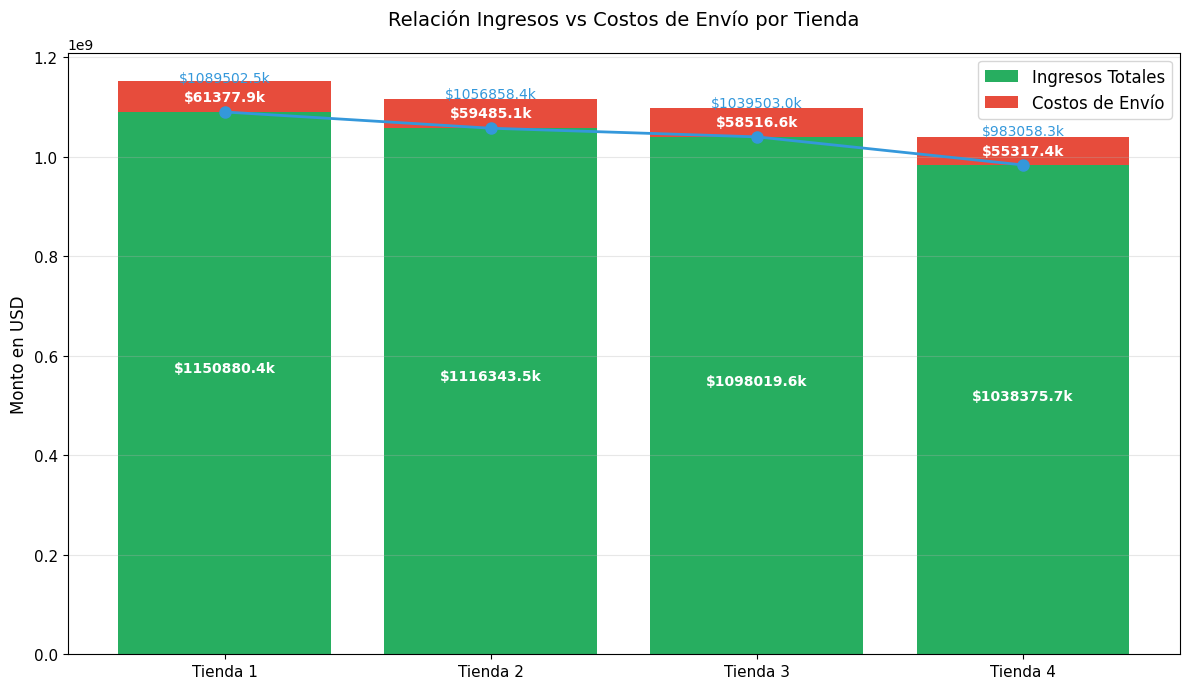

In [ ]:
plt.figure(figsize=(12, 7))

# Definimos los datos directamente
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [tienda['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()]
costos_envio = [tienda['Costo de envío'].sum(), tienda2['Costo de envío'].sum(), tienda3['Costo de envío'].sum(), tienda4['Costo de envío'].sum()]

# Creamos las barras
bars1 = plt.bar(tiendas, ingresos, label='Ingresos Totales', color='#27ae60')
bars2 = plt.bar(tiendas, costos_envio, bottom=[i-c for i,c in zip(ingresos, costos_envio)],
                label='Costos de Envío', color='#e74c3c')

# Añadimos los valores
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'${height/1000:.1f}k',
             ha='center', va='center',
             color='white', fontweight='bold', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    idx = bars2.index(bar)
    total_height = ingresos[idx]
    plt.text(bar.get_x() + bar.get_width()/2., total_height - height/2,
             f'${height/1000:.1f}k',
             ha='center', va='center',
             color='white', fontweight='bold', fontsize=10)

plt.title('Relación Ingresos vs Costos de Envío por Tienda', pad=20, fontsize=14)
plt.ylabel('Monto en USD', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', alpha=0.3)

# Añadir margen bruto como línea
margenes = [i - c for i, c in zip(ingresos, costos_envio)]
plt.plot(tiendas, margenes, 'o-', color='#3498db', linewidth=2, markersize=8, label='Margen Bruto')
for i, m in enumerate(margenes):
    plt.text(i, m + max(margenes)*0.05, f'${m/1000:.1f}k',
             ha='center', va='bottom', color='#3498db', fontsize=10)

plt.tight_layout()
plt.show()

# 6.2. GRAFICA: SATISFACCION VS PRECIO PROMEDIO POR CATEGORIA

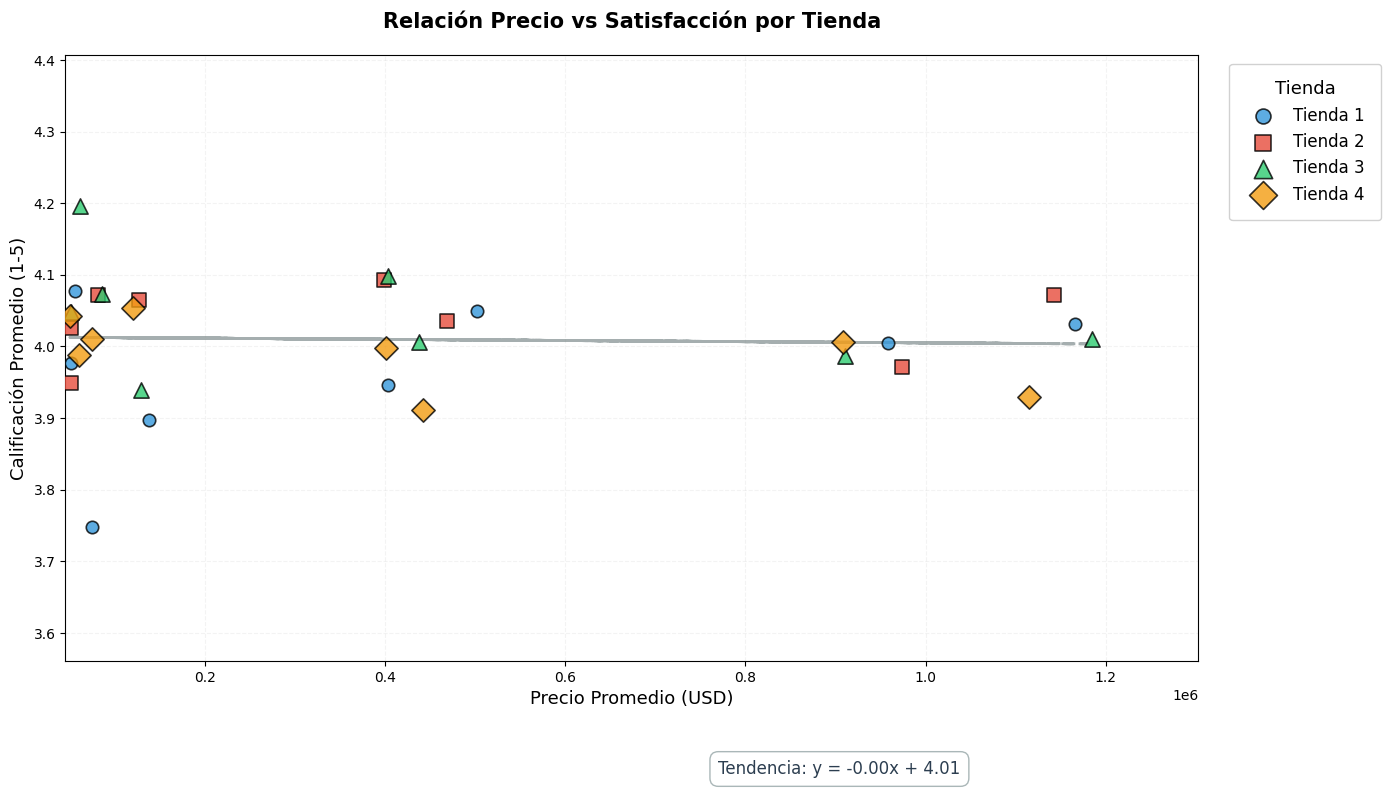

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Configuración estética mejorada
colors = {'Tienda 1': '#3498db', 'Tienda 2': '#e74c3c', 'Tienda 3': '#2ecc71', 'Tienda 4': '#f39c12'}
markers = {'Tienda 1': 'o', 'Tienda 2': 's', 'Tienda 3': '^', 'Tienda 4': 'D'}
marker_sizes = {'Tienda 1': 80, 'Tienda 2': 100, 'Tienda 3': 120, 'Tienda 4': 140}  # Tamaños distintos por tienda

# Validamos que existan las columnas necesarias
try:
    for tienda_nombre in scatter_data['Tienda'].unique():
        subset = scatter_data[scatter_data['Tienda'] == tienda_nombre]
        if not subset.empty and 'Precio' in subset.columns and 'Calificación' in subset.columns:
            # Configuración mejorada de los puntos
            plt.scatter(subset['Precio'], subset['Calificación'],
                       s=marker_sizes[tienda_nombre],  # Tamaño fijo por tienda
                       c=colors[tienda_nombre],
                       marker=markers[tienda_nombre],
                       alpha=0.8,  # Mayor opacidad
                       label=tienda_nombre,
                       edgecolor='black',  # Borde negro para mejor contraste
                       linewidth=1.2,     # Grosor del borde aumentado
                       zorder=3)          # Para que los puntos estén sobre la línea de tendencia

    plt.title('Relación Precio vs Satisfacción por Tienda', pad=20, fontsize=15, fontweight='bold')
    plt.xlabel('Precio Promedio (USD)', fontsize=13)
    plt.ylabel('Calificación Promedio (1-5)', fontsize=13)
    plt.grid(True, alpha=0.15, linestyle='--')

    # Leyenda mejorada
    legend = plt.legend(title='Tienda', title_fontsize=13, fontsize=12,
                       markerscale=1.2,  # Aumenta tamaño de iconos en leyenda
                       framealpha=0.9,   # Fondo semitransparente
                       bbox_to_anchor=(1.02, 1),
                       loc='upper left',
                       borderpad=1)

    # Añadir línea de tendencia (debajo de los puntos)
    if not scatter_data.empty:
        z = np.polyfit(scatter_data['Precio'], scatter_data['Calificación'], 1)
        p = np.poly1d(z)
        plt.plot(scatter_data['Precio'], p(scatter_data['Precio']),
                color='#7f8c8d',
                linestyle='--',
                linewidth=2,
                alpha=0.7,
                zorder=2)  # Debajo de los puntos

        # Anotación de tendencia con fondo
        plt.text(scatter_data['Precio'].max()*0.65, p(scatter_data['Precio'].max())*0.85,
                f"Tendencia: y = {z[0]:.2f}x + {z[1]:.2f}",
                color='#2c3e50',
                fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='#95a5a6', boxstyle='round,pad=0.5'))

    # Ajustar límites para mejor visualización
    plt.xlim(left=scatter_data['Precio'].min()*0.9, right=scatter_data['Precio'].max()*1.1)
    plt.ylim(bottom=scatter_data['Calificación'].min()*0.95, top=scatter_data['Calificación'].max()*1.05)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el gráfico: {str(e)}")
    print("Verifique que los datos contengan las columnas 'Precio' y 'Calificación'")
    print("Verifique que los datos contengan las columnas 'Precio' y 'Calificación'")

# 6.3. GRAFICA: DISTRIBUCION DE VENTAS POR CATEGORIA Y TIENDA

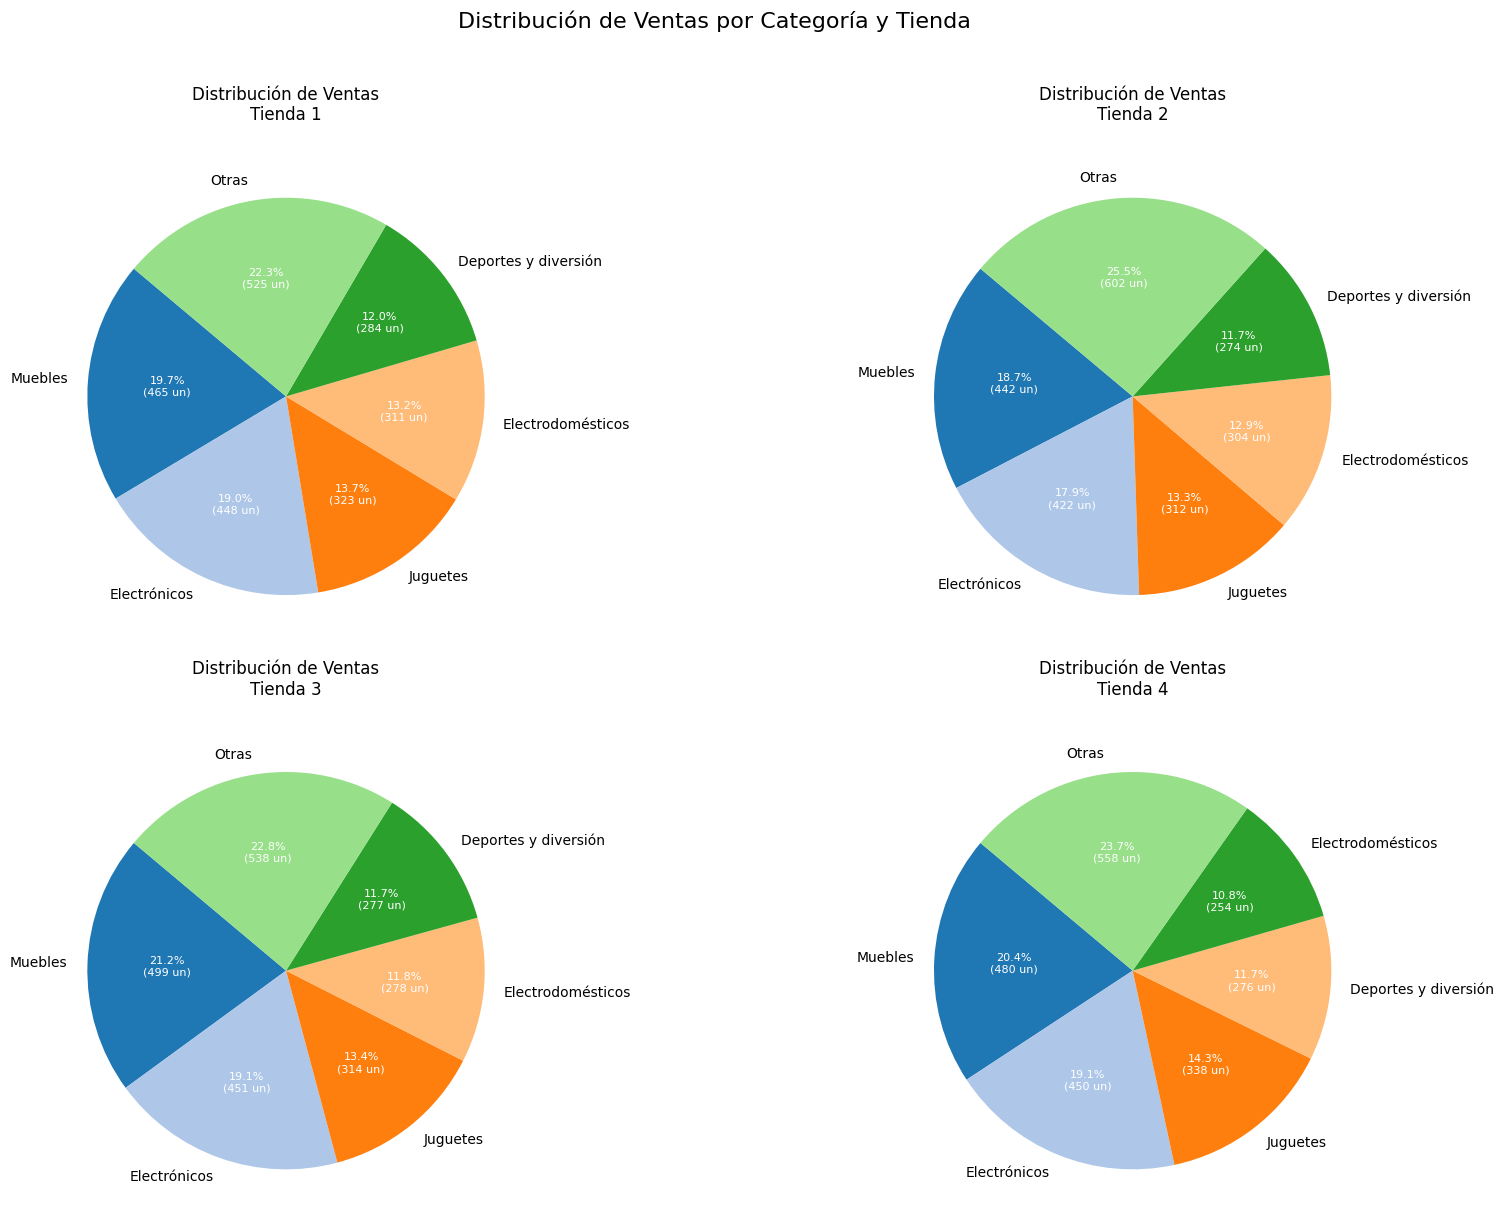

In [ ]:
from matplotlib.gridspec import GridSpec

def generar_grafico_circular(categorias_tienda):
    fig = plt.figure(figsize=(18, 12))
    gs = GridSpec(2, 2, figure=fig)

    try:
        if not all(col in categorias_tienda.columns for col in ['Tienda', 'Categoría del Producto', 'Ventas']):
            raise ValueError("El DataFrame no tiene las columnas requeridas")

        tiendas = categorias_tienda['Tienda'].unique()[:4]

        for i, tienda_nombre in enumerate(tiendas):
            ax = fig.add_subplot(gs[i])
            data = categorias_tienda[categorias_tienda['Tienda'] == tienda_nombre]

            if not data.empty:
                data = data.sort_values('Ventas', ascending=False)
                small_cats = data[data['Ventas'] < data['Ventas'].quantile(0.3)]

                if len(small_cats) > 0:
                    main_data = data[data['Ventas'] >= data['Ventas'].quantile(0.3)]
                    other_row = pd.DataFrame({
                        'Categoría del Producto': ['Otras'],
                        'Ventas': [small_cats['Ventas'].sum()],
                        'Tienda': [tienda_nombre]
                    })
                    data = pd.concat([main_data, other_row])

                def format_autopct(p):
                    unidades = int(p * sum(data["Ventas"]) / 100)
                    return f'{p:.1f}%\n({unidades} un)'

                wedges, texts, autotexts = ax.pie(
                    data['Ventas'],
                    labels=data['Categoría del Producto'],
                    autopct=format_autopct,
                    startangle=140,
                    colors=plt.cm.tab20.colors[:len(data)],
                    textprops={'fontsize': 9}
                )

                ax.set_title(f'Distribución de Ventas\n{tienda_nombre}', pad=20, fontsize=12)

                for text in texts:
                    text.set_size(10)
                for autotext in autotexts:
                    autotext.set_size(8)
                    autotext.set_color('white')

        plt.suptitle('Distribución de Ventas por Categoría y Tienda', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al generar gráfico circular: {str(e)}")
        print("Solución:")
        print("1. Verifique que el DataFrame tenga las columnas 'Tienda', 'Categoría' y 'Ventas'")
        print("2. Asegúrese que los valores en 'Ventas' sean numéricos")
        print("3. Compruebe que haya datos para al menos una tienda")


# Crear el DataFrame combinado con los datos de las tiendas
categorias_tienda = pd.concat([
    tienda.groupby('Categoría del Producto').size().rename('Ventas').reset_index().assign(Tienda='Tienda 1'),
    tienda2.groupby('Categoría del Producto').size().rename('Ventas').reset_index().assign(Tienda='Tienda 2'),
    tienda3.groupby('Categoría del Producto').size().rename('Ventas').reset_index().assign(Tienda='Tienda 3'),
    tienda4.groupby('Categoría del Producto').size().rename('Ventas').reset_index().assign(Tienda='Tienda 4')
])


generar_grafico_circular(categorias_tienda)

# Informe Final: Recomendación sobre la Venta de una Tienda para el Sr. Juan

## Introducción
El propósito de este análisis es determinar cuál de las cuatro tiendas del Sr. Juan debe vender, considerando factores clave como los ingresos totales, las categorías y productos más y menos vendidos, las calificaciones promedio de los clientes y los costos de envío promedio. A través de un análisis detallado de los datos y visualizaciones generadas, se evaluarán las fortalezas y debilidades de cada tienda para proporcionar una recomendación fundamentada que maximice el valor para el Sr. Juan.

## Desarrollo

### 1. Ingresos Totales por Tienda
Los ingresos totales reflejan el desempeño financiero de cada tienda. Según el análisis:

- **Tienda 1**: $1,454,330,400.00
- **Tienda 2**: $1,494,162,500.00
- **Tienda 3**: $1,490,776,600.00
- **Tienda 4**: $1,466,176,900.00

**Observación**: La **Tienda 2** genera los mayores ingresos, seguida de cerca por la Tienda 3. La Tienda 1 tiene los ingresos más bajos, lo que podría indicar un menor volumen de ventas o precios promedio más bajos.

### 2. Categorías de Productos Más y Menos Vendidas
El análisis de las categorías de productos permite identificar las áreas de mayor demanda:

- **Categorías más vendidas (en términos de ingresos)**:
  - **Electrónicos**: Domina en todas las tiendas, especialmente en la Tienda 2, donde representa una proporción significativa de los ingresos.
  - **Muebles**: Segunda categoría más relevante, con buena representación en todas las tiendas.
  
- **Categorías menos vendidas**:
  - **Juguetes** y **Ropa**: Estas categorías generan consistentemente menos ingresos en todas las tiendas, con ventas mínimas en comparación con Electrónicos y Muebles.

**Visualización**: Los gráficos de barras generados muestran que la Tienda 2 lidera en ingresos por Electrónicos, lo que refuerza su posición financiera sólida. La Tienda 1, aunque tiene ventas en Electrónicos, muestra una distribución menos equilibrada entre categorías.

### 3. Calificaciones Promedio de los Clientes
La satisfacción del cliente, medida a través de las calificaciones promedio (escala de 1 a 5), es un indicador clave de la calidad del servicio:

- **Tienda 1**: 3.06
- **Tienda 2**: 3.03
- **Tienda 3**: 3.02
- **Tienda 4**: 3.07

**Observación**: Las calificaciones son similares entre las tiendas, con la **Tienda 4** teniendo una ligera ventaja. Sin embargo, ninguna tienda destaca significativamente en este aspecto, lo que sugiere que la satisfacción del cliente no es un diferenciador fuerte. La Tienda 1, a pesar de sus menores ingresos, tiene una calificación competitiva, lo que indica un servicio aceptable.

### 4. Productos Más y Menos Vendidos
Identificar los productos más y menos vendidos ayuda a entender las preferencias de los clientes:

- **Productos más vendidos**:
  - **Smartphone** y **Televisor**: Generan los mayores ingresos en todas las tiendas, especialmente en la Tienda 2, debido a su alto precio unitario y demanda.
  - **Silla de oficina** y **Mesa de comedor**: También tienen un desempeño sólido en la categoría de Muebles.

- **Productos menos vendidos**:
  - **Peluche**, **Camiseta** y **Juego de mesa**: Estos productos, asociados a las categorías de Juguetes y Ropa, tienen ventas marginales en todas las tiendas.

**Visualización**: Los gráficos de los productos más vendidos muestran que la Tienda 2 tiene un volumen significativamente mayor de ventas de Smartphones y Televisores, lo que contribuye a sus altos ingresos. La Tienda 1, por otro lado, tiene un desempeño más débil en estos productos clave.

### 5. Coste de Envío Promedio
El costo de envío promedio puede afectar la competitividad de las tiendas y la satisfacción del cliente:

- **Tienda 1**: $28,312.46
- **Tienda 2**: $29,853.39
- **Tienda 3**: $29,158.45
- **Tienda 4**: $28,646.54

**Observación**: La **Tienda 1** tiene el costo de envío promedio más bajo, lo que podría ser una ventaja competitiva, especialmente para clientes sensibles al precio. La **Tienda 2** tiene el costo más alto, lo que podría impactar negativamente la percepción del valor por parte de los clientes, a pesar de sus altos ingresos.

## Análisis Comparativo
A continuación, se resumen las fortalezas y debilidades de cada tienda:

- **Tienda 1**:
  - **Fortalezas**: Costo de envío promedio más bajo, calificación de clientes competitiva.
  - **Debilidades**: Menores ingresos totales, menor participación en categorías de alto valor como Electrónicos, distribución menos equilibrada de ventas por categoría.
  
- **Tienda 2**:
  - **Fortalezas**: Mayores ingresos totales, liderazgo en ventas de Electrónicos (especialmente Smartphones y Televisores), sólido desempeño en Muebles.
  - **Debilidades**: Costo de envío promedio más alto, calificación de clientes ligeramente inferior.

- **Tienda 3**:
  - **Fortalezas**: Ingresos altos, cercanos a los de la Tienda 2, buen desempeño en Electrónicos y Muebles.
  - **Debilidades**: Calificación de clientes más baja, costos de envío promedio sin ventajas significativas.

- **Tienda 4**:
  - **Fortalezas**: Mayor calificación promedio de clientes, costos de envío competitivos.
  - **Debilidades**: Ingresos totales menores que las Tiendas 2 y 3, menor liderazgo en categorías clave.

## Conclusión y Recomendación
Tras analizar los datos y las visualizaciones, se recomienda que el Sr. Juan **venda la Tienda 1**. Esta decisión se basa en los siguientes puntos:

1. **Menores ingresos totales**: La Tienda 1 genera significativamente menos ingresos ($1,454,330,400) en comparación con las otras tiendas, lo que indica un menor potencial de crecimiento y rentabilidad a largo plazo.

2. **Desempeño débil en categorías clave**: Aunque tiene ventas en Electrónicos, la Tienda 1 no lidera en productos de alto valor como Smartphones y Televisores, que son los principales impulsores de ingresos en las otras tiendas.

3. **Ventajas limitadas**: A pesar de tener el costo de envío promedio más bajo y una calificación de clientes competitiva, estas ventajas no compensan su bajo desempeño financiero y su menor diversificación en categorías de productos.

4. **Fortalezas de las otras tiendas**:
   - La **Tienda 2** destaca por sus altos ingresos y liderazgo en Electrónicos, lo que la convierte en un activo valioso para retener.
   - La **Tienda 3** tiene un desempeño financiero sólido y un potencial similar al de la Tienda 2.
   - La **Tienda 4**, aunque no lidera en ingresos, tiene la mejor calificación de clientes y costos de envío competitivos, lo que sugiere un potencial de mejora con estrategias adecuadas.

**Justificación final**: Vender la Tienda 1 permitirá al Sr. Juan concentrar sus recursos en las tiendas con mayor potencial de ingresos y crecimiento (Tiendas 2, 3 y 4). La Tienda 1, aunque operativa, no ofrece ventajas competitivas significativas en el contexto actual, y su venta podría liberar capital para invertir en mejorar las operaciones de las otras tiendas, especialmente en áreas como la reducción de costos de envío o la expansión de categorías de alto valor.

Este análisis, respaldado por los datos y visualizaciones generadas, proporciona una base sólida para tomar una decisión estratégica que optimice el portafolio de tiendas del Sr. Juan.